# Exploring SF Salaries

<p>The dataset is from Kaggle.</p> 
More details here: https://www.kaggle.com/kaggle/sf-salaries        

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "C:\\Users\\30448\\Documents\\Kaggle\\SFsalaries"
df = pd.read_csv( path + "\\input\\salaries.csv")
print "Dataset has %d rows and %d columns" % (df.shape[0] , df.shape[1] )
df.head()

Dataset has 148654 rows and 13 columns


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


<b> Pre-processing on the string features <b>

In [2]:
df["EmployeeName"] = df["EmployeeName"].apply(lambda x:x.lower())
df["JobTitle"] = df["JobTitle"].apply(lambda x:x.lower())
df["namelength"] = df["EmployeeName"].apply(lambda x:len(x.split()))
df["compoundName"] = df["EmployeeName"].apply(lambda x: 1 if "-" in x else 0 )

#last name analysis
def lastName(x):
    sp = x.split()
    if sp[-1].lower() == "jr":
        return sp[-2]
    else:
        return sp[-1]  
    
df["lastName"] = df["EmployeeName"].apply(lastName)

<b> What are the most common first and last names? </b>

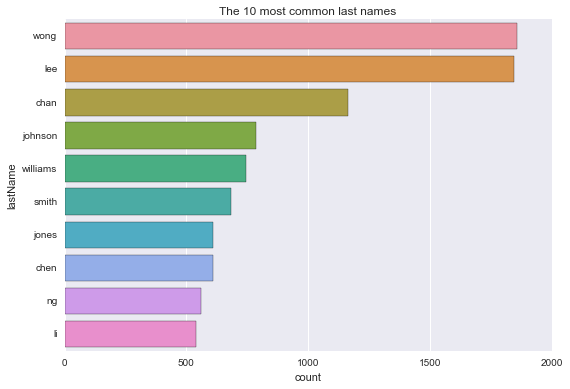

In [3]:
#last name
sns.countplot(y = "lastName" , data = df , order=df["lastName"].value_counts()[:10].index)
sns.plt.title("The 10 most common last names")
plt.tight_layout()

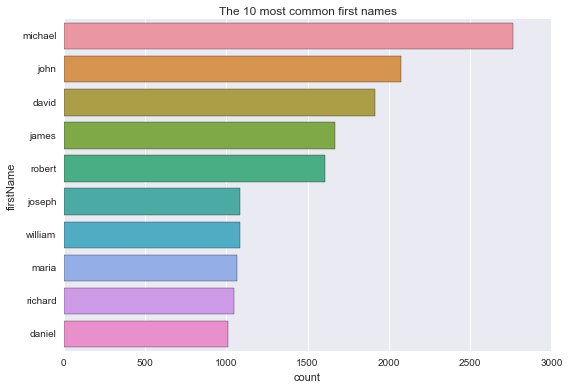

In [4]:
#first name
df["firstName"] = df["EmployeeName"].apply(lambda x:x.split()[0])
sns.countplot(y = "firstName" , data = df , order=df["firstName"].value_counts()[:10].index)
sns.plt.title("The 10 most common first names")
plt.tight_layout()

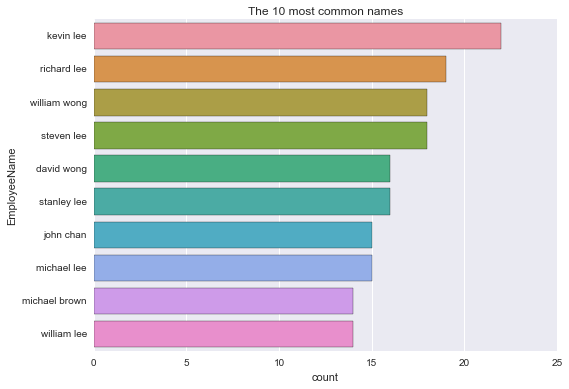

In [5]:
# first and last name
sns.countplot(y = "EmployeeName" , data = df , order=df["EmployeeName"].value_counts()[:10].index)
sns.plt.title("The 10 most common names")
plt.tight_layout()

<b>What are the most common jobs?</b>

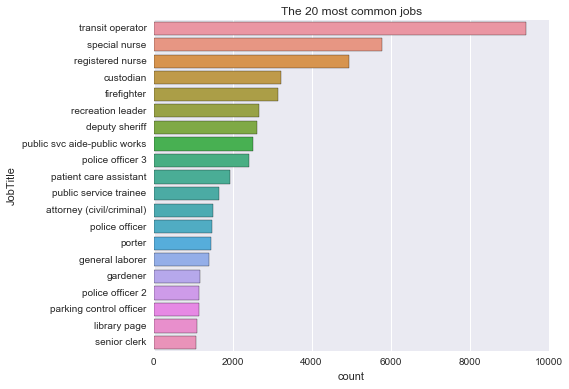

In [6]:
# job titles
sns.countplot(y = "JobTitle" , data = df , order=df["JobTitle"].value_counts()[:20].index)
sns.plt.title("The 20 most common jobs")
plt.tight_layout()

<b> For each of the 10 most common jobs what are the most common names? </b>

In [7]:
most_freq_jobs = df["JobTitle"].value_counts()[:10].index
top_names = []
for job in most_freq_jobs:    
    top_names.append(list(  df.loc[df["JobTitle"] == job]["firstName"].value_counts()[:3].index  ))
pd.DataFrame(top_names , index = most_freq_jobs)

,0,1,2
transit operator,michael,john,james
special nurse,maria,mary,jennifer
registered nurse,maria,mary,jennifer
custodian,li,maria,luis
firefighter,michael,john,david
recreation leader,michael,robert,christopher
deputy sheriff,michael,robert,david
public svc aide-public works,robert,michael,james
police officer 3,michael,robert,john
patient care assistant,maria,mark,mary


In [31]:
#pre-processing the salaries: replacing NaN and strings by median
salary_types = ["BasePay" , "OvertimePay" , "OtherPay" ,"Benefits" , "TotalPay" ]
colors = ['b', 'r' , 'g' ,'k' , 'y' ]
for i,salary in enumerate(salary_types):    
    df[salary] = df[salary].fillna("Not Provided") 
    median = np.median([int(x) for x in df[salary] if not (type(x) == str)])    
    df[salary] = df[salary].apply(lambda x: median if (type(x) == str) else int(x))    
    #ax = sns.kdeplot(df[salary] , color = colors[i] )
    #ax.set_xlim(-100000,100000)       

<b> For each of the 10 most common jobs, what is the salary distribution? </b>

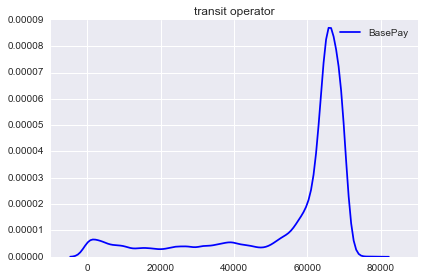

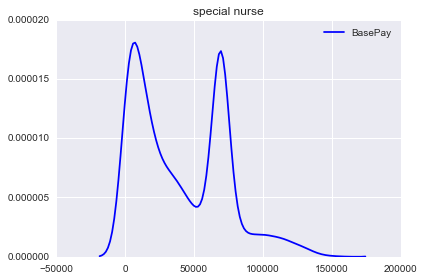

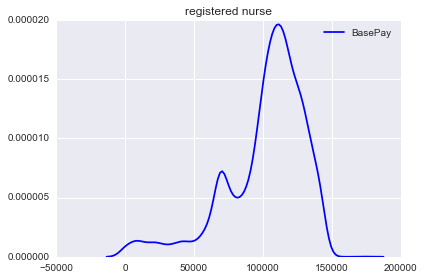

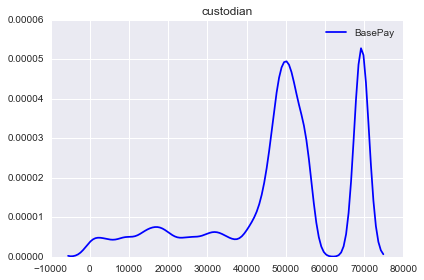

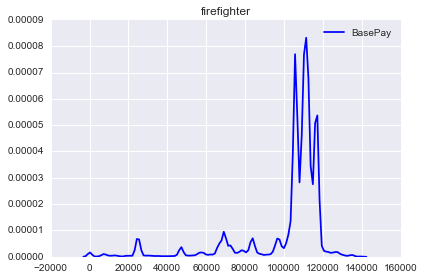

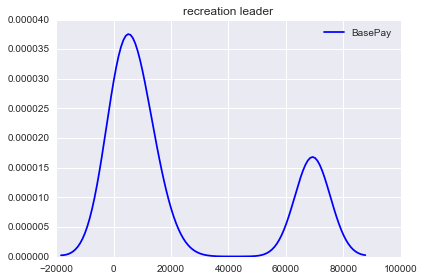

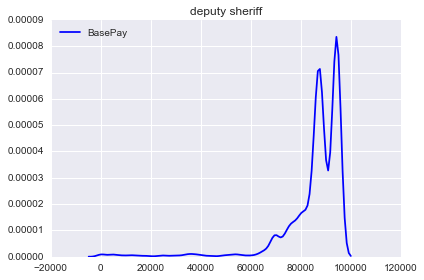

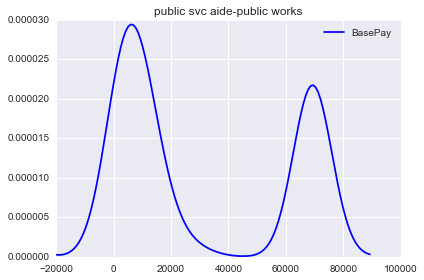

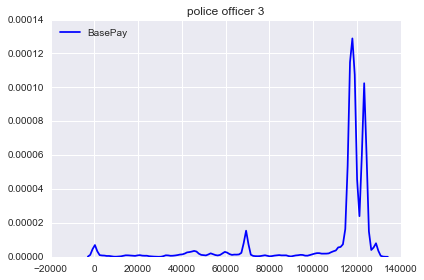

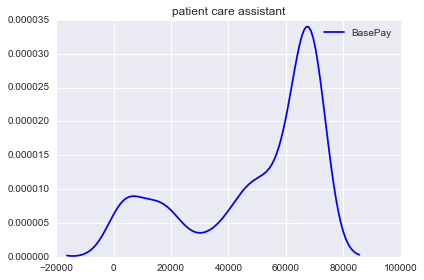

In [32]:
#salary distribution by jobs (take only the most freq jobs)
most_freq_jobs = df["JobTitle"].value_counts()[:10].index
for job in most_freq_jobs:    
    job_salary  = df.loc[df["JobTitle"] == job]["BasePay"]    
    plt.figure()
    ax = plt.axes()
    sns.kdeplot(job_salary , color = 'b' , ax = ax )   
    ax.set_title(job)
    plt.tight_layout()

<b> Are people mostly Full Time or Part Time Employees? </b>

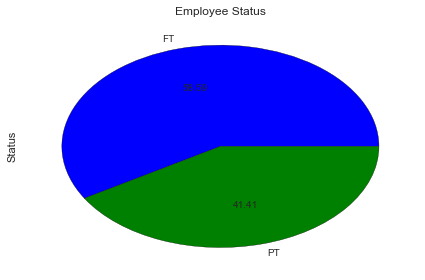

In [33]:
df["Status"].value_counts().plot(kind = "pie" , title = "Employee Status" , autopct='%.2f')
plt.tight_layout()